In [1]:
#IMPORT PACKAGES
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import pytz #for timezone calculation
import math
import matplotlib.dates as md
import gc
import os
from datetime import datetime
import calendar
import seaborn as sns; sns.set()
import itertools
#import datetime
from time import gmtime, strftime
from matplotlib import cm
from IPython.display import display
#%matplotlib qt
#%matplotlib inline

#SET GLOBAL PARAMETERS
# ================== Global parameters for fonts & sizes =================
FONT_SIZE = 20
rc={'font.size': FONT_SIZE, 'axes.labelsize': FONT_SIZE, 'legend.fontsize': FONT_SIZE, 
    'axes.titlesize': FONT_SIZE, 'xtick.labelsize': FONT_SIZE, 'ytick.labelsize': FONT_SIZE}
plt.rcParams.update(**rc)
plt.rc('font', weight='bold')
 
# For label titles
fontdict={'fontsize': FONT_SIZE, 'fontweight' : 'bold'}
# can add in above dictionary: 'verticalalignment': 'baseline' 

style = 'ggplot' # choose a style from the above options
plt.style.use(style)
#for local package testing
from energy_calculation import *
from clear_sky_day import *
from tripping_curt import *
from vvar_curt import *
from vwatt_curt import *
from polyfit import *
from file_processing import *
from data_visualization import *

C:\Users\samha\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


analyzing sample 1


C:\Users\samha\Documents\CANVAS\CANVAS-Open-Source\src\solarcurtailment\tripping_curt.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  m,c = np.linalg.lstsq(A,y)[0]


,c_id,date,clear sky day,energy generated (kWh),expected energy generated (kWh),estimation method,tripping response,tripping curtailment (kWh),V-VAr response,V-VAr curtailment (kWh),V-Watt response,V-Watt curtailment (kWh)
0,1317822057,2019-09-03,False,11.227399,16.042172,Linear,Yes,4.814773,Yes,0.0,Inconclusive due to non clear sky day.,NaN


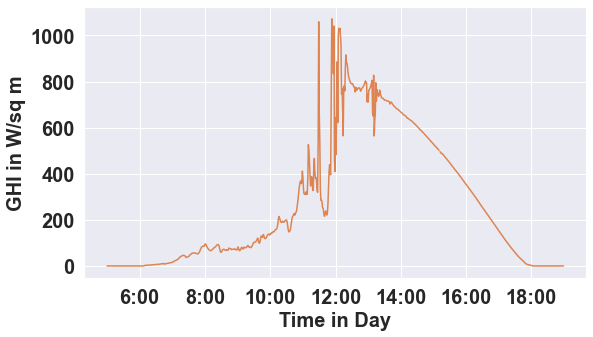

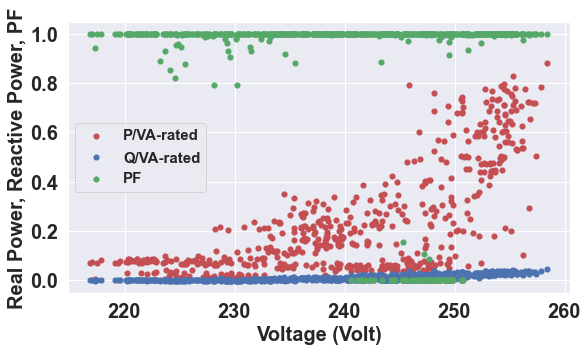

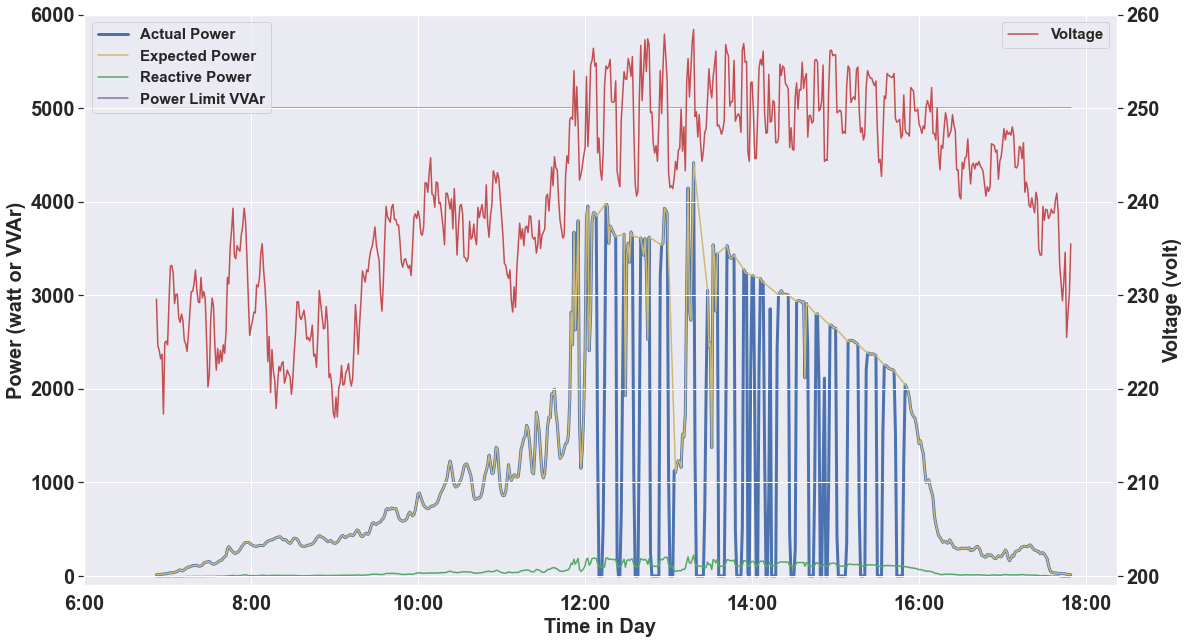

analyzing sample 11


C:\Users\samha\Documents\CANVAS\CANVAS-Open-Source\src\solarcurtailment\tripping_curt.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  m,c = np.linalg.lstsq(A,y)[0]


,c_id,date,clear sky day,energy generated (kWh),expected energy generated (kWh),estimation method,tripping response,tripping curtailment (kWh),V-VAr response,V-VAr curtailment (kWh),V-Watt response,V-Watt curtailment (kWh)
0,2084803628,2020-01-17,True,28.463915,33.126945,Polyfit,Yes,4.66303,Yes,0.0,None,0


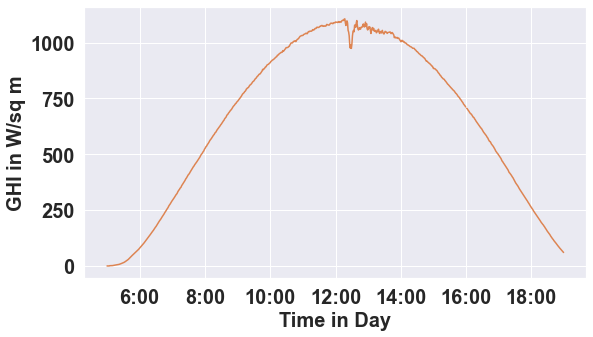

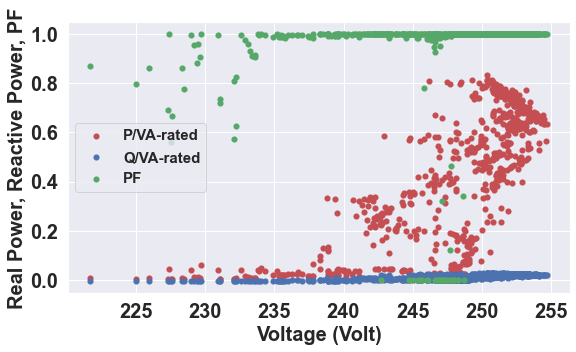

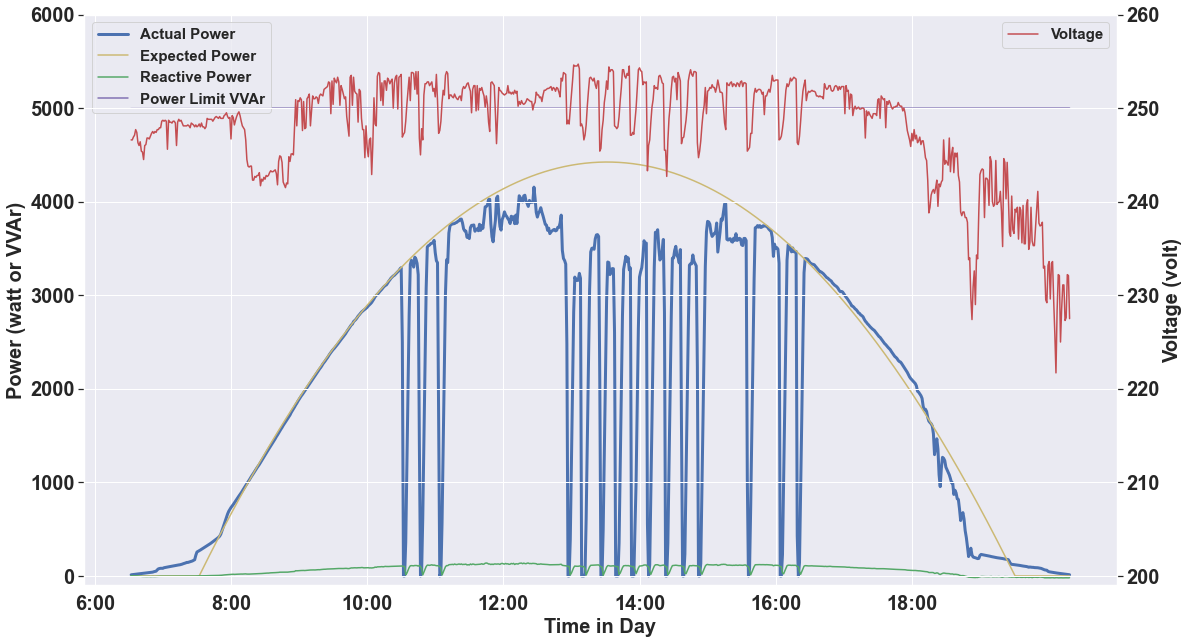

analyzing sample 14


,c_id,date,clear sky day,energy generated (kWh),expected energy generated (kWh),estimation method,tripping response,tripping curtailment (kWh),V-VAr response,V-VAr curtailment (kWh),V-Watt response,V-Watt curtailment (kWh)
0,173654980,2020-01-17,True,41.922012,45.094955,Polyfit,None,0,Yes,3.172943,None,0


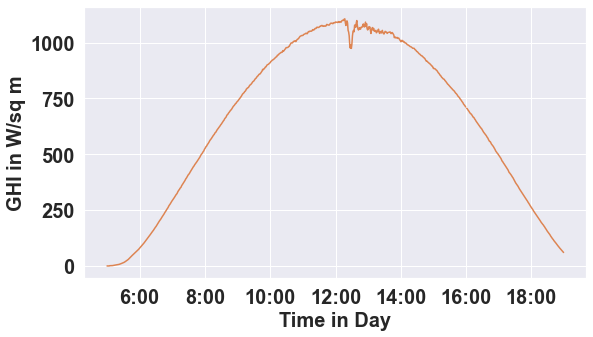

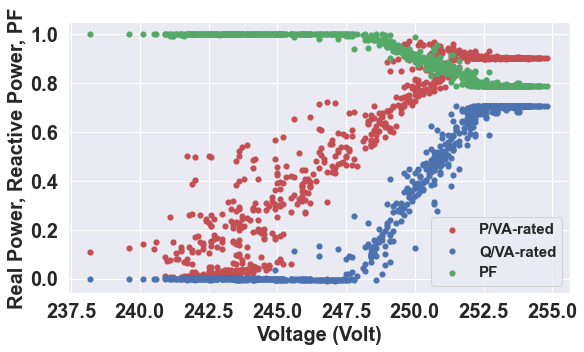

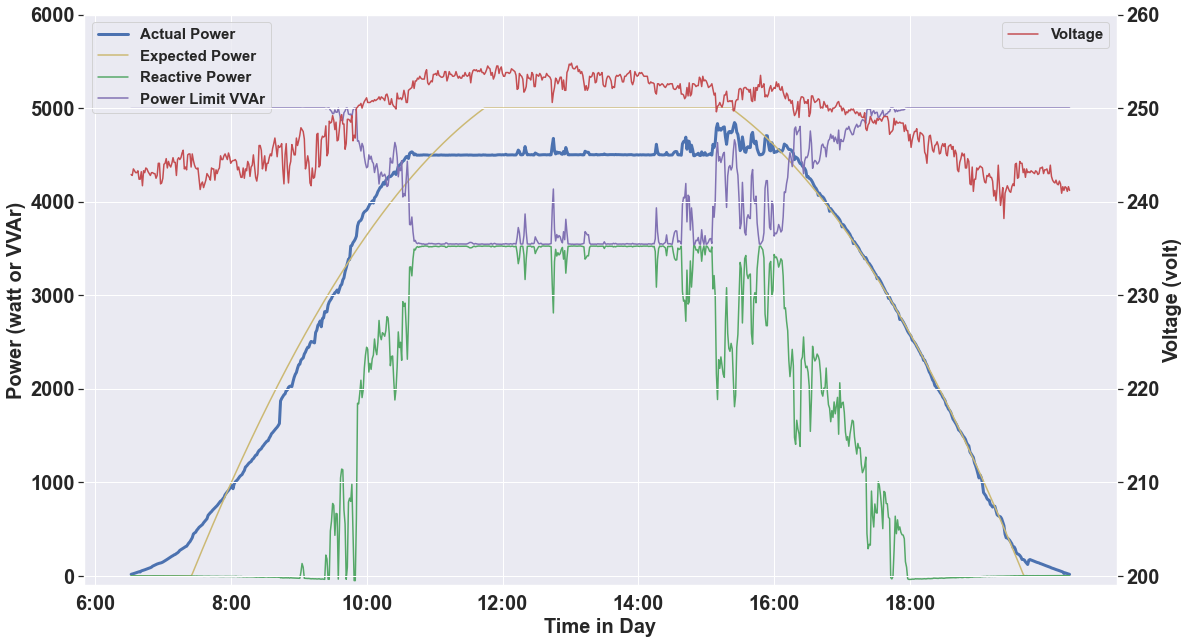

analyzing sample 4


,c_id,date,clear sky day,energy generated (kWh),expected energy generated (kWh),estimation method,tripping response,tripping curtailment (kWh),V-VAr response,V-VAr curtailment (kWh),V-Watt response,V-Watt curtailment (kWh)
0,1165442853,2020-04-13,True,31.951955,36.438568,Polyfit,None,0,Yes,0.0,Yes,4.486613


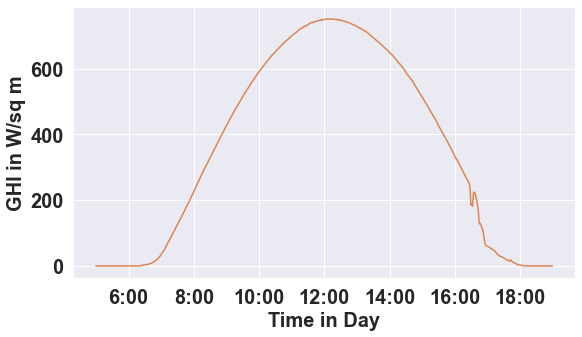

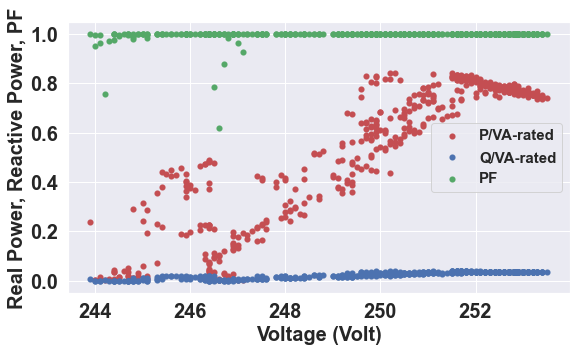

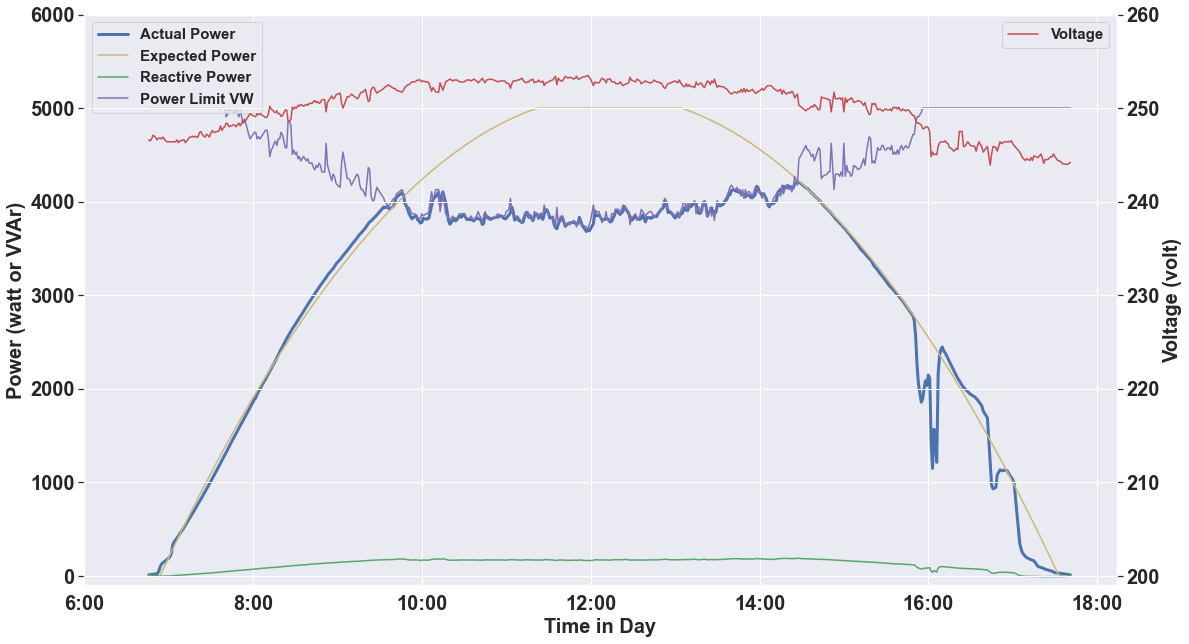

analyzing sample 5
Cannot analyze this sample due to incomplete data.
analyzing sample 8


,c_id,date,clear sky day,energy generated (kWh),expected energy generated (kWh),estimation method,tripping response,tripping curtailment (kWh),V-VAr response,V-VAr curtailment (kWh),V-Watt response,V-Watt curtailment (kWh)
0,1700492033,2020-01-17,True,22.965787,23.011685,Polyfit,None,0,Yes,0.045898,None,0


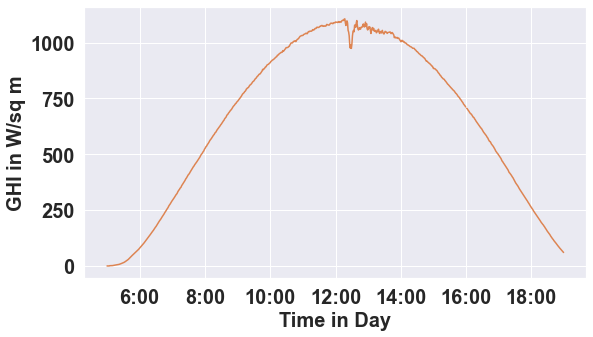

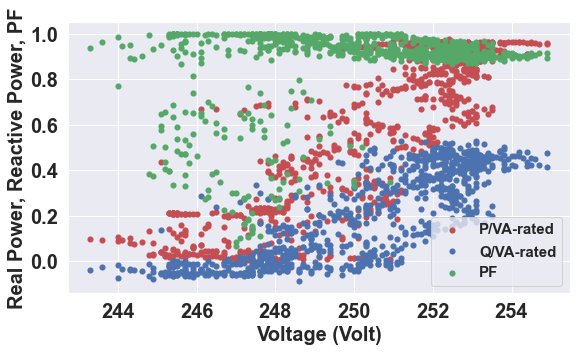

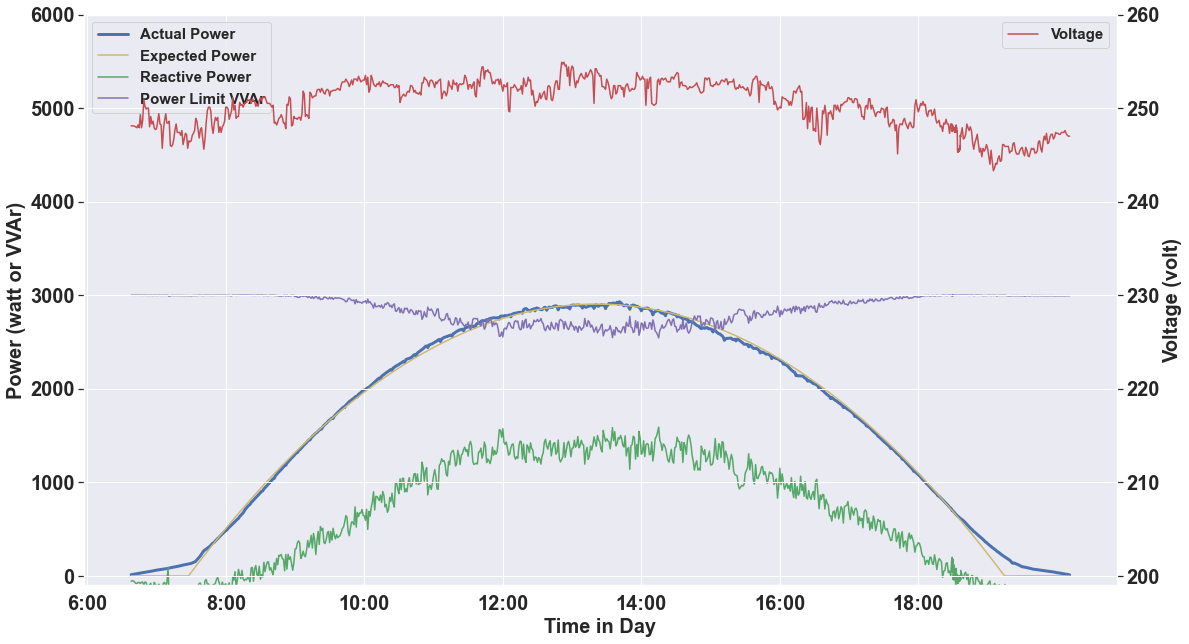

analyzing sample 9


,c_id,date,clear sky day,energy generated (kWh),expected energy generated (kWh),estimation method,tripping response,tripping curtailment (kWh),V-VAr response,V-VAr curtailment (kWh),V-Watt response,V-Watt curtailment (kWh)
0,389622988,2020-01-17,True,34.867516,34.867516,Polyfit,None,0,Yes,0.0,None,0


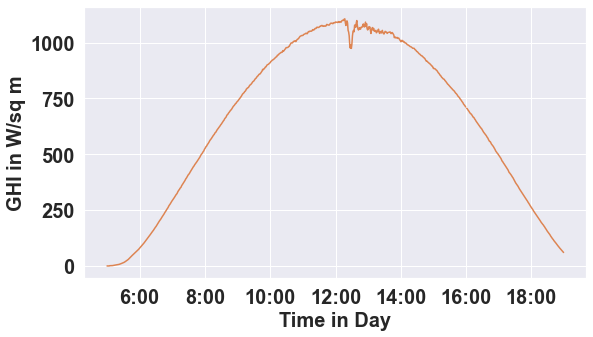

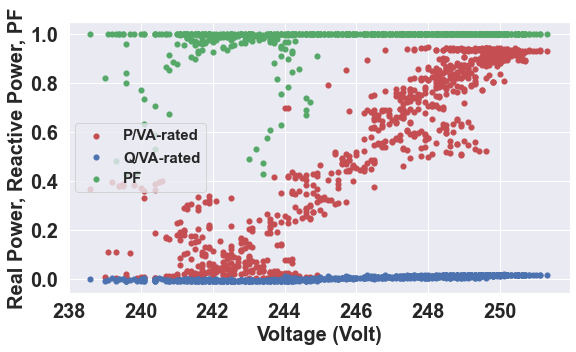

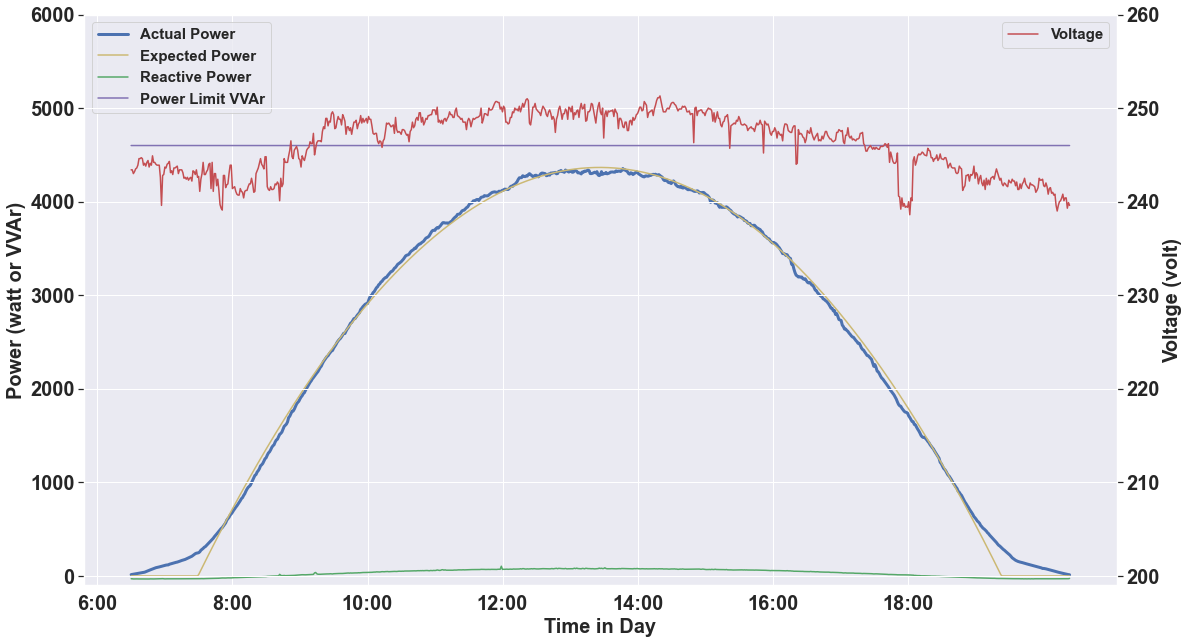

In [162]:
#file_path = r"/Users/samhan/Downloads/data" #this is for running in Samhan's laptop
file_path = r"C:\Users\samha\Documents\CANVAS\data" #for running in TETB CEEM09 computer

for sample_number in [1, 11, 14, 4, 5, 8, 9]:
    print('analyzing sample {}'.format(sample_number))
    data_file = '/data_sample_{}.csv'.format(sample_number)
    ghi_file = '/ghi_sample_{}.csv'.format(sample_number)

    site_details, unique_cids= input_general_files(file_path)
    summary_all_samples = pd.DataFrame()

    data = pd.read_csv(file_path + data_file)
    size_is_ok = check_data_size(data)
    if not size_is_ok:
        print('Cannot analyze this sample due to incomplete data.')
    else:
        ghi = pd.read_csv(file_path + ghi_file, index_col = 0)
        ghi.index = pd.to_datetime(ghi.index)
        pd.to_datetime(data['Timestamp'].str.slice(0, 19, 1))
        data['Timestamp'] = pd.to_datetime(data['Timestamp'].str.slice(0, 19, 1))
        data.set_index('Timestamp', inplace=True)

        c_id = data['c_id'][0]
        date = str(data.index[0])[:10]

        data_site, ac_cap, dc_cap, EFF_SYSTEM, inverter = site_organize(c_id, site_details, data, unique_cids)
        data_site = resample_in_minute(data_site)

        #check the expected power using polyfit
        data_site, polyfit, is_good_polyfit_quality = check_polyfit(data_site, ac_cap)
        #data_site, a, is_good_polyfit_quality = check_polyfit_constrained(data_site, ac_cap)

        is_clear_sky_day = check_clear_sky_day(date, file_path)
        tripping_response, tripping_curt_energy, estimation_method, data_site = check_tripping_curtailment(is_clear_sky_day, c_id, data_site, unique_cids, ac_cap, site_details, date)    
        energy_generated, data_site = check_energy_generated(data_site, date, is_clear_sky_day, tripping_curt_energy)
        vvar_response, vvar_curt_energy, data_site = check_vvar_curtailment(c_id, date, data_site, ghi, ac_cap, dc_cap, EFF_SYSTEM, is_clear_sky_day)
        data_site, vwatt_response, vwatt_curt_energy = check_vwatt_curtailment(data_site, date, is_good_polyfit_quality, file_path, ac_cap, is_clear_sky_day)

        energy_generated_expected, estimation_method = check_energy_expected(energy_generated, tripping_curt_energy, vvar_curt_energy, vwatt_curt_energy, is_clear_sky_day)

        summary = summarize_result_into_dataframe(c_id, date, is_clear_sky_day, energy_generated, energy_generated_expected, estimation_method, tripping_response, tripping_curt_energy, vvar_response, vvar_curt_energy, vwatt_response, vwatt_curt_energy)

        display(summary)
        display_ghi(ghi, date)
        display_power_scatter(data_site, ac_cap)
        display_power_voltage(data_site, date, vwatt_response, vvar_response)

    is_inject_or_absorb = (data_site['reactive_power'].abs() > 100).any()
    if not is_inject_or_absorb:
        vvar_response = 'None'
    else:
        # OBTAIN REACTIVE POWER LEVEL IN %
        data_site['q_level_percent'] = data_site['reactive_power'] / ac_cap * 100

        # RECHECK AND CORRECT THE POLARITY
        filter_more_235 = data_site['voltage'] > 235
        polarity_wrong = data_site.loc[filter_more_235, 'q_level_percent'].sum() > 0
        if polarity_wrong:
            data_site.loc[filter_more_235, 'q_level_percent'] = - data_site.loc[filter_more_235, 'q_level_percent']

        # CHECK HOW IT LOOKS LIKE VVAR CURVE

        #    OBTAIN THE LINEAR EQ
        #      Filter out the zeros and the minimum q level
        minimum_q_level = data_site['q_level_percent'].min()
        ERROR_PERCENT = 5
        filter_zero = data_site['q_level_percent'] < - ERROR_PERCENT
        filter_minimum = data_site['q_level_percent'] > minimum_q_level + ERROR_PERCENT
        filter_for_linreg = filter_zero & filter_minimum

        data_site['q_level_forreg'] = data_site.loc[filter_for_linreg, 'q_level_percent']

        try:
            #      Perform linear regression
            from sklearn.linear_model import LinearRegression

            X = np.array(data_site.loc[filter_for_linreg, 'voltage']).reshape(-1, 1)  # values converts it into a numpy array
            Y = np.array(data_site.loc[filter_for_linreg, 'q_level_percent']).reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
            all_voltage = np.array(data_site['voltage']).reshape(-1, 1)

            linear_regressor = LinearRegression()  # create object for the class
            linear_regressor.fit(X, Y)  # perform linear regression
            data_site['q_level_regresult'] = linear_regressor.predict(all_voltage)  # make predictions

            data_site.loc[data_site['q_level_regresult'] > 0, 'q_level_regresult'] = float('nan')
            data_site.loc[data_site['q_level_regresult'] < minimum_q_level, 'q_level_regresult'] = float('nan')

            #    GET V3, V4
            V3 = (data_site.loc[data_site['q_level_regresult'] == data_site['q_level_regresult'].max(), 'voltage']).mean()

            V4 = (data_site.loc[data_site['q_level_regresult'] == data_site['q_level_regresult'].min(), 'voltage']).mean()

            BUFFER_VAR_PERCENT = 15

            decreasing_var = data_site.loc[data_site['q_level_regresult'].notna(), ['voltage', 'q_level_percent', 'q_level_regresult']]
            decreasing_var['upper_buffer'] = decreasing_var['q_level_regresult'] + BUFFER_VAR_PERCENT
            decreasing_var['lower_buffer'] = decreasing_var['q_level_regresult'] - BUFFER_VAR_PERCENT

            #    CHECK PERCENTAGE COMPLIANCE
            is_low_ok = decreasing_var['lower_buffer'] < decreasing_var['q_level_percent']
            is_upp_ok = decreasing_var['q_level_percent'] < decreasing_var['upper_buffer']
            decreasing_var['is_in_buffer_range'] = is_low_ok & is_upp_ok
            count_in_buffer_range = decreasing_var['is_in_buffer_range'].values.sum() #count true in a col

            percentage_in_buffer_range = float(count_in_buffer_range) / float(len(decreasing_var.index)) * 100
            PERCENTAGE_THRESHOLD = 80

            # According to AS NZS 4777.2 2020. Previously, 2015, the range was narrower but in the range of 2020
            V3_LOWER_LIMIT = 230
            V3_UPPER_LIMIT = 265
            V4_LOWER_LIMIT = 230
            V4_UPPER_LIMIT = 265 

            compliance_percent = percentage_in_buffer_range > PERCENTAGE_THRESHOLD
            compliance_v3 = V3_LOWER_LIMIT < V3 < V3_UPPER_LIMIT 
            compliance_v4 = V4_LOWER_LIMIT < V4 < V4_UPPER_LIMIT 

            if compliance_percent & compliance_v3 & compliance_v4:
                vvar_response = 'Yes'
            else:
                vvar_response = 'None'
        except:
            vvar_response = 'None'

# VVAR RESPONSE CHECKING ALGORITHM

In [2]:
#file_path = r"/Users/samhan/Downloads/data" #this is for running in Samhan's laptop
file_path = r"C:\Users\samha\Documents\CANVAS\data" #for running in TETB CEEM09 computer

sample_number = 14

print('analyzing sample {}'.format(sample_number))
data_file = '/data_sample_{}.csv'.format(sample_number)
ghi_file = '/ghi_sample_{}.csv'.format(sample_number)

site_details, unique_cids= input_general_files(file_path)
summary_all_samples = pd.DataFrame()

data = pd.read_csv(file_path + data_file)
size_is_ok = check_data_size(data)
if not size_is_ok:
    print('Cannot analyze this sample due to incomplete data.')
else:
    ghi = pd.read_csv(file_path + ghi_file, index_col = 0)
    ghi.index = pd.to_datetime(ghi.index)
    pd.to_datetime(data['Timestamp'].str.slice(0, 19, 1))
    data['Timestamp'] = pd.to_datetime(data['Timestamp'].str.slice(0, 19, 1))
    data.set_index('Timestamp', inplace=True)

    c_id = data['c_id'][0]
    date = str(data.index[0])[:10]

    data_site, ac_cap, dc_cap, EFF_SYSTEM, inverter = site_organize(c_id, site_details, data, unique_cids)
    data_site = resample_in_minute(data_site)

    #check the expected power using polyfit
    data_site, polyfit, is_good_polyfit_quality = check_polyfit(data_site, ac_cap)
    #data_site, a, is_good_polyfit_quality = check_polyfit_constrained(data_site, ac_cap)

    is_clear_sky_day = check_clear_sky_day(date, file_path)

analyzing sample 14


In [3]:
is_inject_or_absorb = (data_site['reactive_power'].abs() > 100).any()
if not is_inject_or_absorb:
    vvar_response = 'None'
else:
    # OBTAIN REACTIVE POWER LEVEL IN %
    data_site['q_level_percent'] = data_site['reactive_power'] / ac_cap * 100

    # RECHECK AND CORRECT THE POLARITY
    filter_more_235 = data_site['voltage'] > 235
    polarity_wrong = data_site.loc[filter_more_235, 'q_level_percent'].sum() > 0
    if polarity_wrong:
        data_site.loc[filter_more_235, 'q_level_percent'] = - data_site.loc[filter_more_235, 'q_level_percent']

    # CHECK HOW IT LOOKS LIKE VVAR CURVE

    #    OBTAIN THE LINEAR EQ
    #      Filter out the zeros and the minimum q level
    minimum_q_level = data_site['q_level_percent'].min()
    ERROR_PERCENT = 5
    filter_zero = data_site['q_level_percent'] < - ERROR_PERCENT
    filter_minimum = data_site['q_level_percent'] > minimum_q_level + ERROR_PERCENT
    filter_for_linreg = filter_zero & filter_minimum

    data_site['q_level_forreg'] = data_site.loc[filter_for_linreg, 'q_level_percent']

    try:
        #      Perform linear regression
        from sklearn.linear_model import LinearRegression

        X = np.array(data_site.loc[filter_for_linreg, 'voltage']).reshape(-1, 1)  # values converts it into a numpy array
        Y = np.array(data_site.loc[filter_for_linreg, 'q_level_percent']).reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
        all_voltage = np.array(data_site['voltage']).reshape(-1, 1)

        linear_regressor = LinearRegression()  # create object for the class
        linear_regressor.fit(X, Y)  # perform linear regression
        data_site['q_level_regresult'] = linear_regressor.predict(all_voltage)  # make predictions

        data_site.loc[data_site['q_level_regresult'] > 0, 'q_level_regresult'] = float('nan')
        data_site.loc[data_site['q_level_regresult'] < minimum_q_level, 'q_level_regresult'] = float('nan')

        #    GET V3, V4
        V3 = (data_site.loc[data_site['q_level_regresult'] == data_site['q_level_regresult'].max(), 'voltage']).mean()

        V4 = (data_site.loc[data_site['q_level_regresult'] == data_site['q_level_regresult'].min(), 'voltage']).mean()

        BUFFER_VAR_PERCENT = 15

        decreasing_var = data_site.loc[data_site['q_level_regresult'].notna(), ['voltage', 'q_level_percent', 'q_level_regresult']]
        decreasing_var['upper_buffer'] = decreasing_var['q_level_regresult'] + BUFFER_VAR_PERCENT
        decreasing_var['lower_buffer'] = decreasing_var['q_level_regresult'] - BUFFER_VAR_PERCENT

        #    CHECK PERCENTAGE COMPLIANCE
        is_low_ok = decreasing_var['lower_buffer'] < decreasing_var['q_level_percent']
        is_upp_ok = decreasing_var['q_level_percent'] < decreasing_var['upper_buffer']
        decreasing_var['is_in_buffer_range'] = is_low_ok & is_upp_ok
        count_in_buffer_range = decreasing_var['is_in_buffer_range'].values.sum() #count true in a col

        percentage_in_buffer_range = float(count_in_buffer_range) / float(len(decreasing_var.index)) * 100
        PERCENTAGE_THRESHOLD = 80

        # This is according to the combined range from SAPN TS-129, AS/NZS 4777-2015, ENA recommendation - 2019, and
        # AS/NZS 4777 - 2020 (Australia B - small sytems) with 1.5 margin to take random error into account.
        V3_LOWER_LIMIT = 233.5
        V3_UPPER_LIMIT = 251.5
        V4_LOWER_LIMIT = 251.5
        V4_UPPER_LIMIT = 269.5

        compliance_percent = percentage_in_buffer_range > PERCENTAGE_THRESHOLD
        compliance_v3 = V3_LOWER_LIMIT < V3 < V3_UPPER_LIMIT 
        compliance_v4 = V4_LOWER_LIMIT < V4 < V4_UPPER_LIMIT 

        if compliance_percent & compliance_v3 & compliance_v4:
            vvar_response = 'Yes'
        else:
            vvar_response = 'None'
    except:
        vvar_response = 'None'

# VVAR RESPONSE CHECK VISUALIZATION

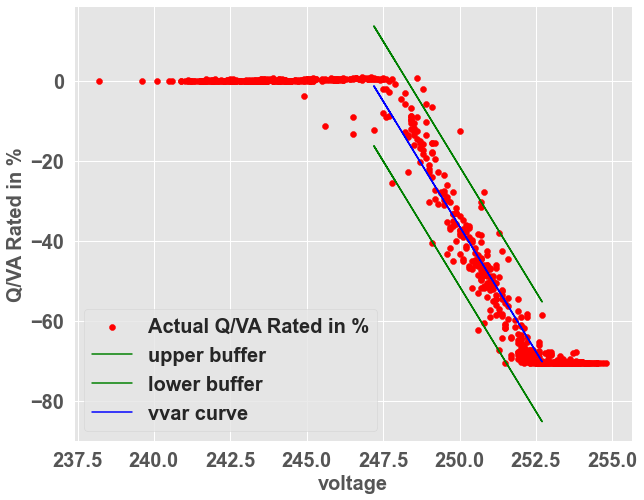

In [4]:
plt.figure(figsize=(10,8))
plt.scatter(data_site['voltage'], data_site['q_level_percent'], color = 'red', label = 'Actual Q/VA Rated in %')
plt.plot(decreasing_var['voltage'], decreasing_var['upper_buffer'], color = 'green', label = 'upper buffer')
plt.plot(decreasing_var['voltage'], decreasing_var['lower_buffer'], color = 'green', label = 'lower buffer')
plt.plot(decreasing_var['voltage'], decreasing_var['q_level_regresult'], color = 'blue', label = 'vvar curve')
plt.xlabel('voltage', **fontdict)
plt.ylabel('Q/VA Rated in %', **fontdict)
plt.legend()

In [6]:
V3

247.2

In [7]:
V4

252.70000000000002